In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [22]:
from tensorflow.keras.datasets import mnist

In [23]:
(features_train, targets_train), (features_test, targets_test) = mnist.load_data()

###Visualization

Label : Image of a  5


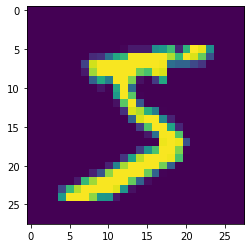

In [24]:
plt.imshow(features_train[0])
print("Label : Image of a ",targets_train[0])

In [43]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        # Define Layers:
        self.l1 = nn.Linear(in_features=28*28, out_features=512)
        self.l2 = nn.Linear(in_features=512, out_features=256)
        self.l3 = nn.Linear(in_features=256, out_features=64)
        self.l4 = nn.Linear(in_features=64, out_features=10)
    def forward(self, x):
        """
        Layers: 4
        Activation Functions:
        RELU for first two layers
        Sigmoid for third layer
        Log Softmax for last layer
        """
        x = torch.flatten(x)
        x = self.l1(x)
        x = self.l2(x)
        x = self.l3(x)
        x = self.l4(x)
        return x

In [44]:
model = ANN()

In [50]:
criterion = nn.MSELoss()

In [28]:
features_train = torch.from_numpy(features_train)
targets_train = torch.from_numpy(targets_train)
features_test = torch.from_numpy(features_test)
targets_test = torch.from_numpy(targets_test)

In [29]:
from torch.utils.data import TensorDataset, DataLoader
dataset = TensorDataset(features_train,targets_train)
loader = DataLoader(dataset=dataset)

In [55]:
# Contains Optimization function available in PyTorch.
LR = 0.00009
EPOCHS = 225
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [31]:
from tqdm import tqdm

In [53]:
def fit(model,EPOCHS,LOSS_FN,OPTIMIZER,loader):
  converted_losses = []
  all_losses = []
  for i in tqdm(range(EPOCHS)):
    # print("Here")
    batch_losses = []
    for idx,(X,Y) in enumerate(loader):
      features = Variable(X).float()
      targets = Variable(Y).float()
      # print("Here1")
      #  Forward pass
      predictions = model(features)
      loss = LOSS_FN(predictions,targets)

      OPTIMIZER.zero_grad()
      loss.backward()
      OPTIMIZER.step()
      batch_losses.append(loss.data)
      all_losses.append(loss.data)
      # print(loss.data)
      if idx%1000 ==0:
        print(idx)
    mbl = np.mean(np.sqrt(batch_losses)).round(3)
    converted_losses.append(mbl)
    
    print("Epoch [{}/{}], Batch loss: {}".format(i, EPOCHS, mbl))
  return converted_losses
  

In [56]:
converted_losses = fit(model,EPOCHS,criterion,optimizer,loader)

  0%|          | 0/225 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000


  0%|          | 1/225 [08:07<30:19:49, 487.45s/it]

Epoch [0/225], Batch loss: nan
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000


  1%|          | 2/225 [16:05<29:50:08, 481.65s/it]

Epoch [1/225], Batch loss: nan
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000


  1%|          | 2/225 [19:02<35:22:51, 571.17s/it]


KeyboardInterrupt: ignored